In [13]:
import qutip

import sys
sys.path.append('/Users/omichel/Desktop/qilimanjaro/projects/scattering/domain_wall_scattering/src')

In [14]:
from DynamicsDefinition import Hamiltonian
from model_building import initialize_system
from dynamics import time_evolution, calculate_expectation_values
from plots import plot_expectations

In [54]:
N = 8
lmd = 0.02272
J = 5
V = 0
V_index = 3
state_dictionary = {'0':1}
ti = 0
tf = 350
nstep = 10000

initial_state, final_state, reg_size = initialize_system(state_dictionary, N, encoding='domain_wall', one_step=False)

H = Hamiltonian(N, lmd, J, V, V_index)

simulation = time_evolution(H, initial_state, ti, tf, nstep)

exp_values = calculate_expectation_values(simulation, H)

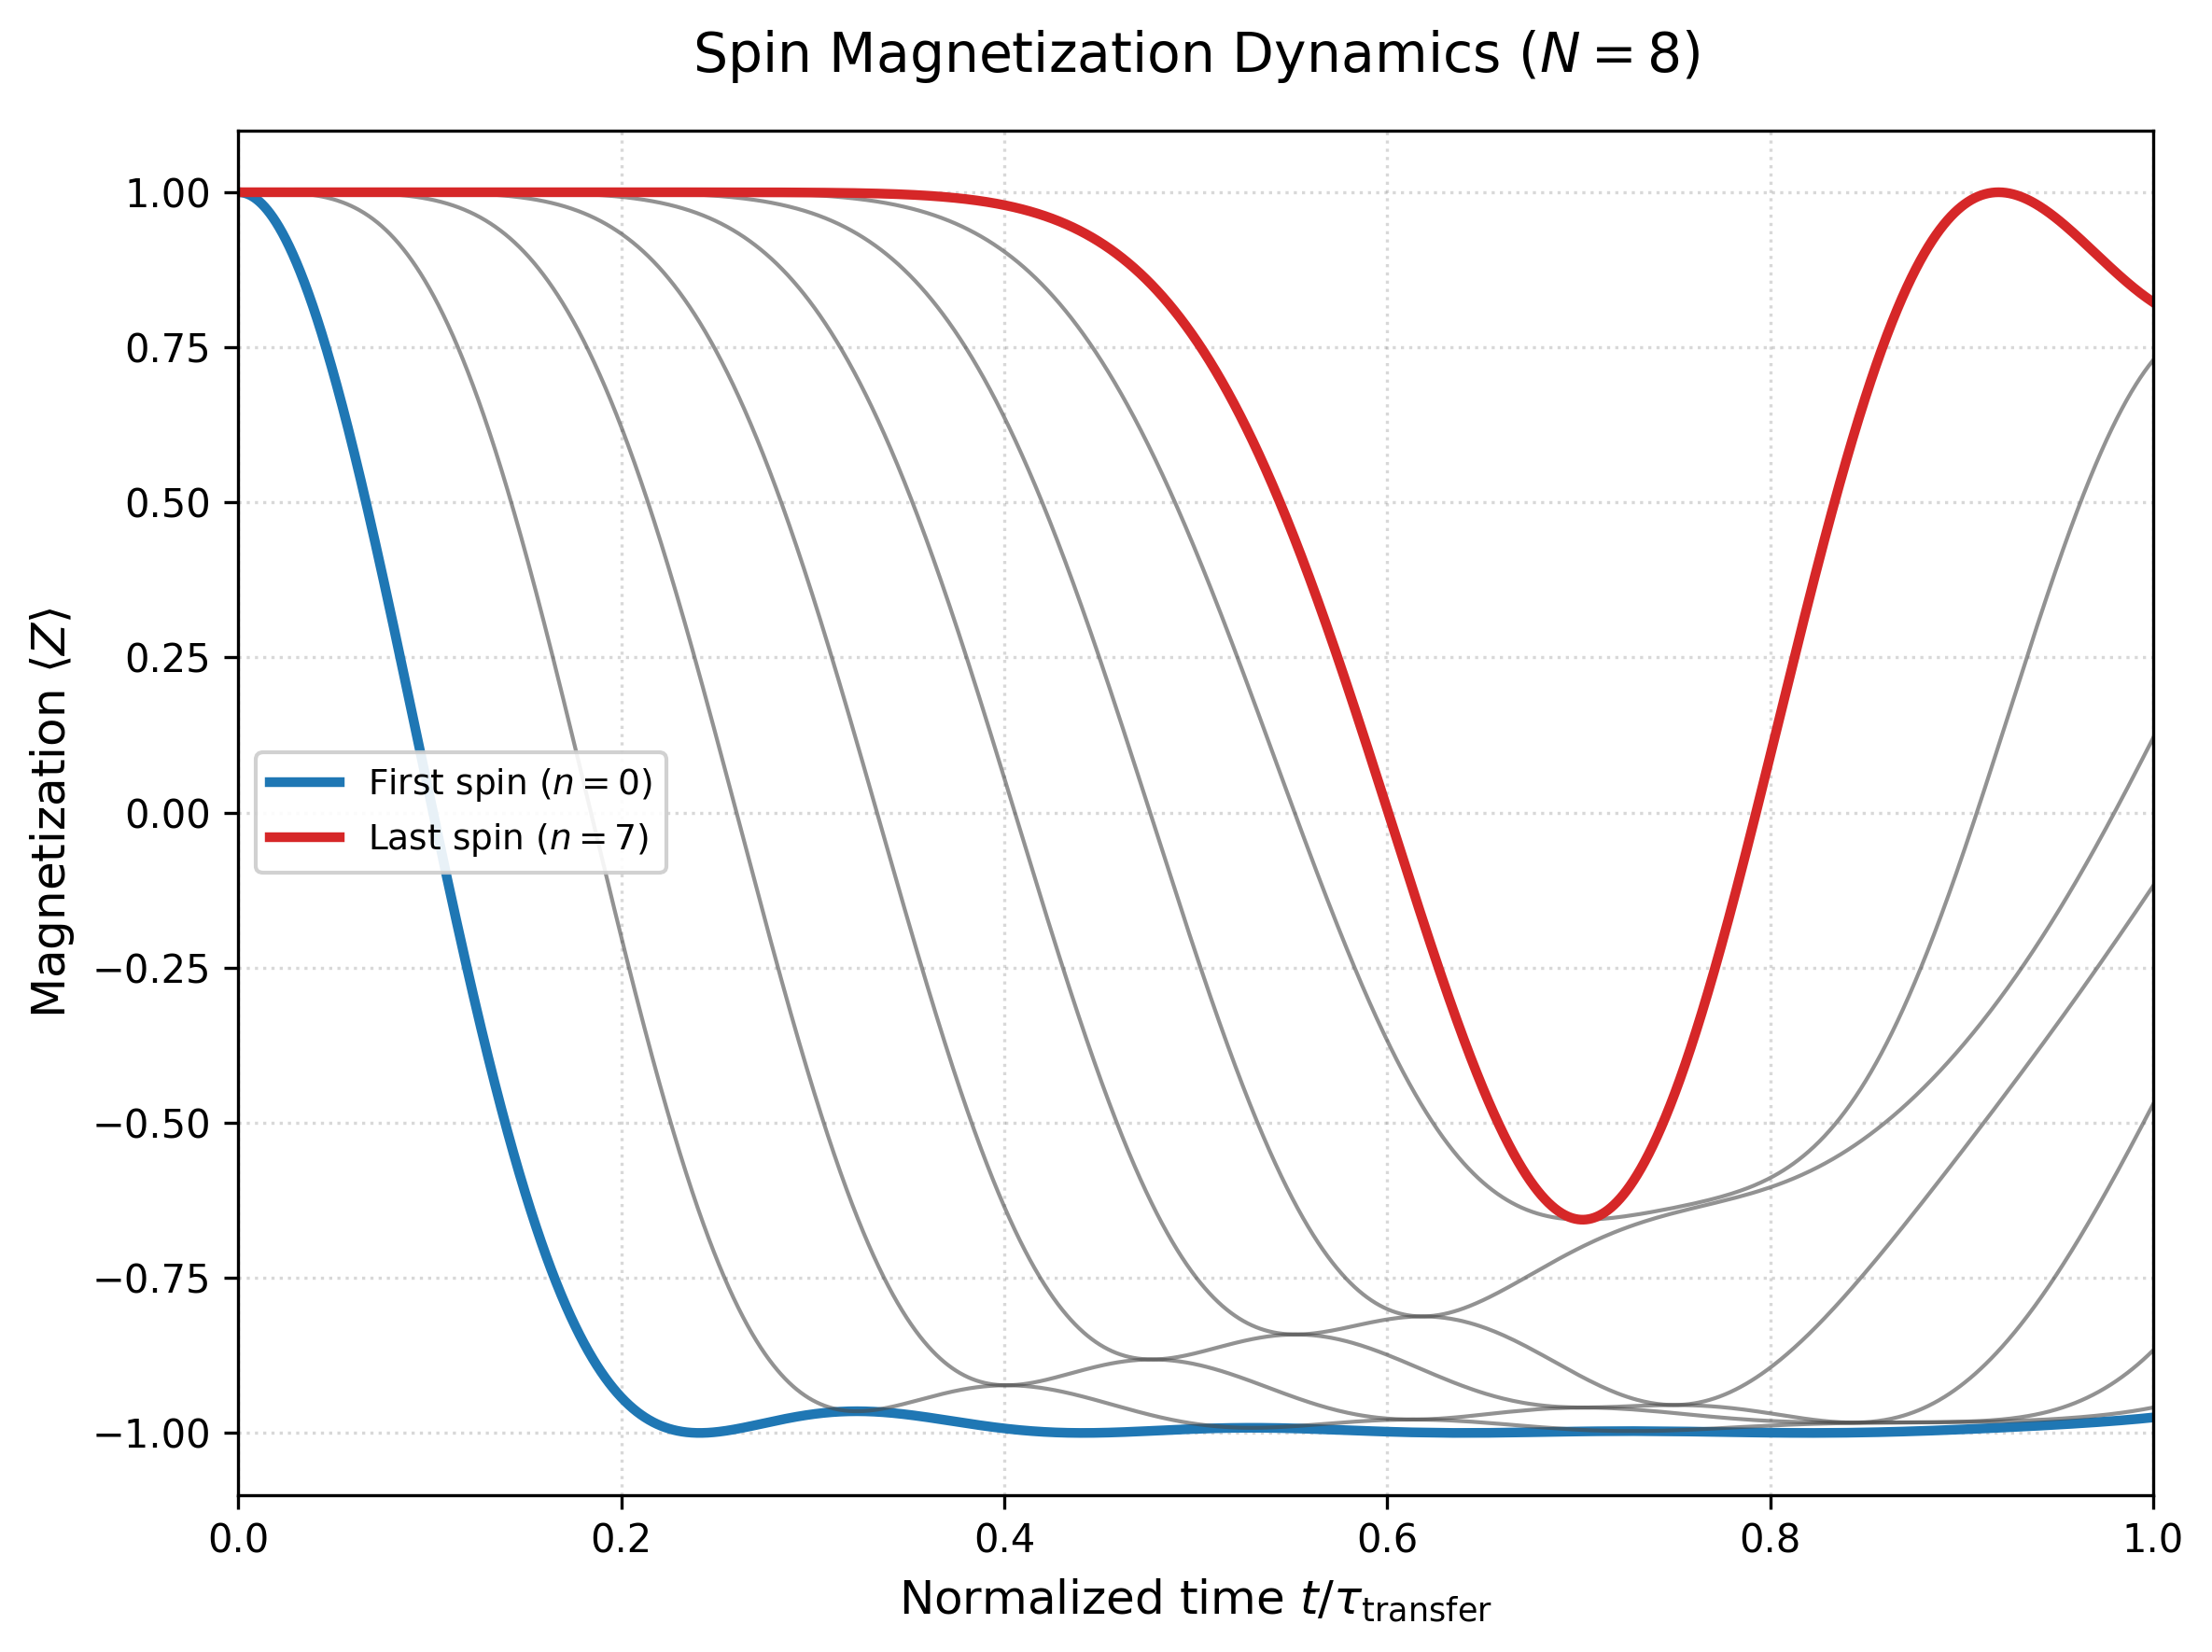

In [55]:
plot_expectations(exp_values['Sz'], N)

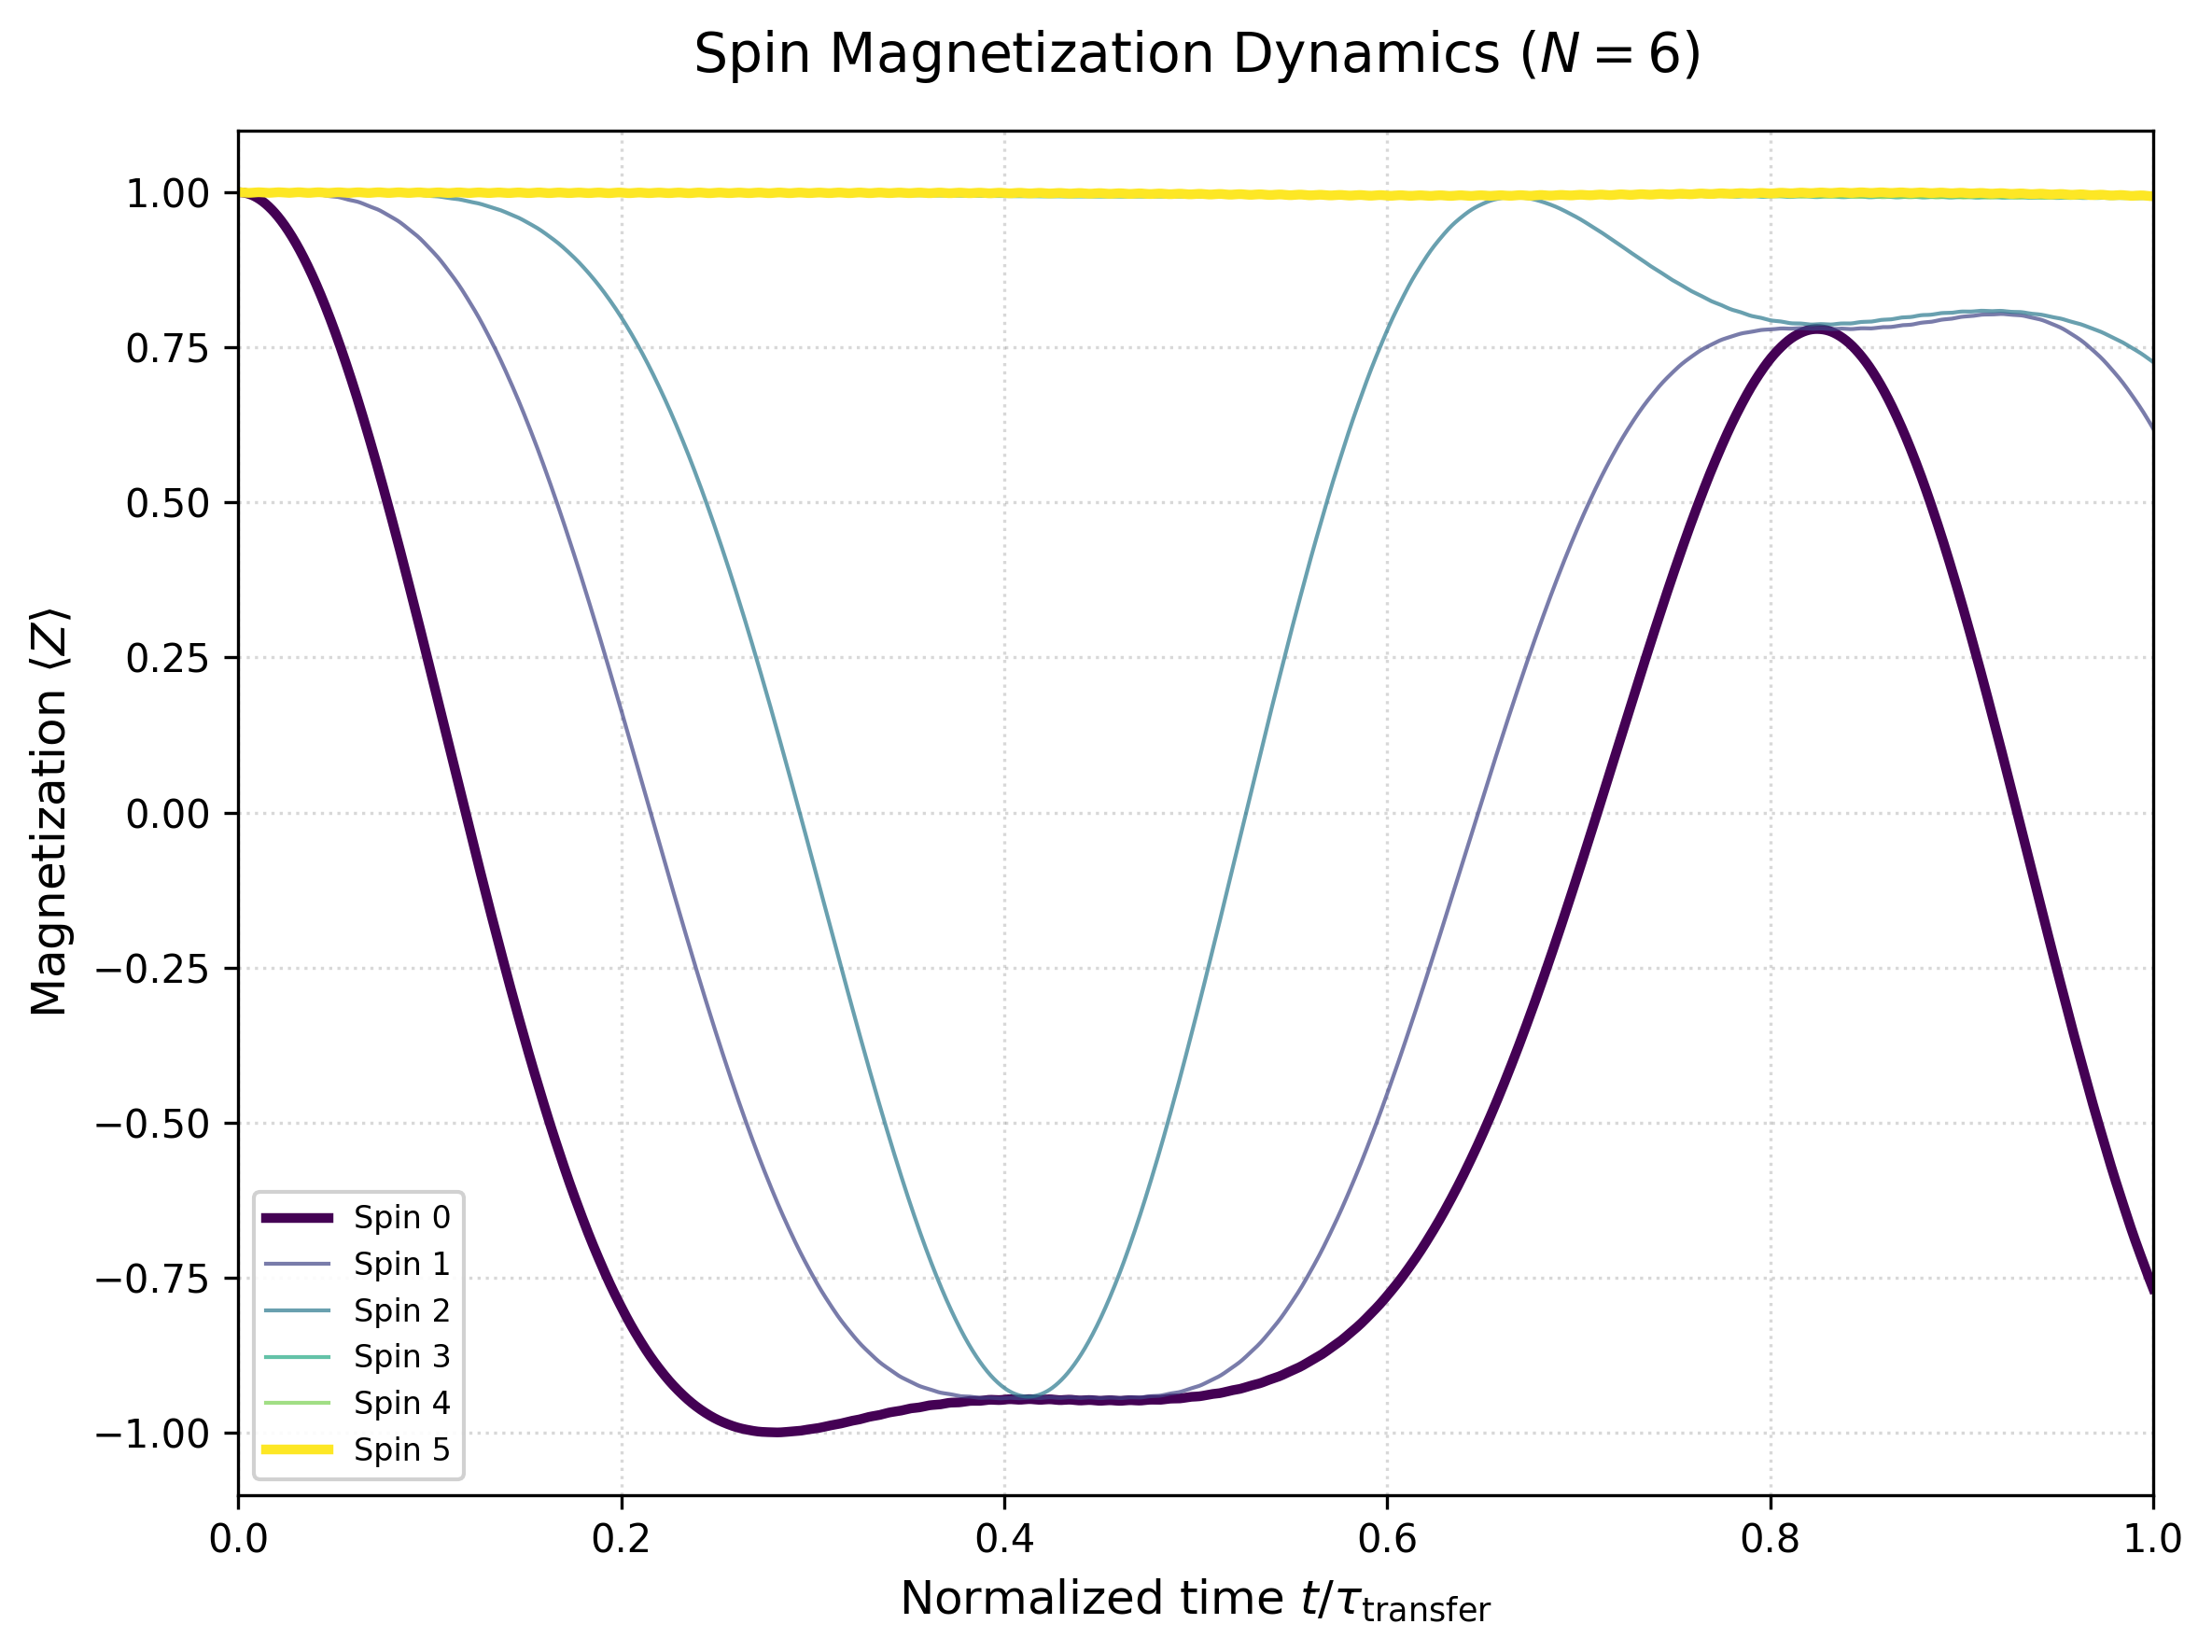

In [17]:
plot_expectations_gradient(exp_values['Sz'], N)